# Introduction to Data Science 
# Lecture 22: Neural Networks I
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll discuss Neural Networks, which can be used for both Classification and Regression. In particular, we'll discuss 
* perceptrons and multi-layer perceptrons (MLP)
* neural networks with scikit-learn
* how to train a neural network

Recommended Reading:
* A. Géron, [Hands-On Machine Learning with Scikit-Learn & TensorFlow](http://proquest.safaribooksonline.com/book/programming/9781491962282) (2017), Ch. 9,10. See also the [associated github page](https://github.com/ageron/handson-ml). 
* Welch Labs, [Neural Networks demystified](https://github.com/stephencwelch/Neural-Networks-Demystified)
* I. Goodfellow and Y. Bengio and A. Courville, [Deep Learning](http://www.deeplearningbook.org/)


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris, make_moons, load_breast_cancer, fetch_mldata, fetch_california_housing
from sklearn.datasets import get_data_home
# from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('ggplot')

## Neural Networks and deep learning

[Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network) were originally motivated by the brain, which is composed of a network of neurons. Each neuron receives a (chemical) signal from other neurons, does a small computation and then decides if and how to release more chemicals. This composition of small calculations can perform complicated tasks! Similarly, an artificial neural network is a network composed of neurons, which we simply think of as a computational units. 

Neural Networks can generally be used for supervised learning tasks, such as classification and regression. (Neural Networks can also be used for unsupervised learning and reinforcement learning, but we won't talk about this.) So, after today, we'll have the following methods for these two supervised learning tasks: 

**Regression** 
+ Linear regression 
+ k Nearest Neighbors (k-NN)
+ Decision Trees
+ *Neural Networks*

**Classification**
+ Logistic Regression
+ k Nearest Neighbors (k-NN)
+ Decision Trees
+ Support vector machines (SVM)
+ *Neural Networks*

Large-scale neural networks are at the core of [deep learning](https://en.wikipedia.org/wiki/Deep_learning), which has gained much publicity for performing very impressive machine learning tasks in the past few years, such as, 
* classifying billions of images (*e.g.*, Google Images)
+ speech recognition (*e.g.*, Amazon's Alexa or Apple’s Siri)
+ video recommendation (*e.g.*, YouTube), 
+ beating the world champion at the game of Go (DeepMind’s AlphaGo).


## Perceptrons

The simplest neural network is called the [perceptron](https://en.wikipedia.org/wiki/Perceptron) and was invented in 1957 by Frank Rosenblatt. The *perceptron* is an binary classifier. It is a function that maps a set of $n$ real features $X = \{x_1, x_2, ..., x_n\}$ to a binary output: 
$$
f(x) = 
\begin{cases}
1 & \textrm{if } \ w\cdot x + b > 0 \\
0 & \textrm{otherwise}
\end{cases}. 
$$
Here, $w \in \mathbb R^n$ is a vector of weights and $b$ is a scalar called the *bias*. (This is very similar to the binary classifier we saw when looking at support vector machines.) 

It is customary to represent this function by the following diagram. 

<img src="perceptron.png" title="https://tex.stackexchange.com/questions/104334/tikz-diagram-of-a-perceptron" width="400">

Just like for previous classification methods, we first *train* the network on data, which is to say that we find good choices of $w$ and $b$ for the training dataset. Then we can see how well the neural networks performs on the test dataset or use it to classify new data points.

Of course, a single perceptron is only a linear discriminator (similar to logistic regression and linear SVM). But things become much more interesting when you start composing many neurons, that is, considering networks with more *layers*. 

## Multilayer perceptron

Like the percpetron, a [**multi-layer perceptron**](https://en.wikipedia.org/wiki/Multilayer_perceptron) is a function that maps features $X = \{x_1, x_2, ..., x_n\}$ to a target $y$. Here is a diagram of a perceptron with three *layers*. 


<img src="Colored_neural_network.svg" title="https://en.wikipedia.org/wiki/Artificial_neural_network#/media/File:Colored_neural_network.svg" 
width="300">
 
In this neural network, we have 
+ an *input layer*, which is the same size as the number of features, 
+ a middle layer, which is usually called a *hidden layer* 
+ and an *output layer*, which should match the target variables

Each layer in this diagram represents a function

$$
\begin{pmatrix}
x^{h}_1 \\
x^{h}_2 \\
x^{h}_3 \\
x^{h}_4
\end{pmatrix}
= 
f \left(
\begin{pmatrix}
A^h_{1,1} & A^h_{1,2} & A^h_{1,3} \\
A^h_{2,1} & A^h_{2,2} & A^h_{2,3} \\
A^h_{3,1} & A^h_{3,2} & A^h_{3,3} \\
A^h_{4,1} & A^h_{4,2} & A^h_{4,3}
\end{pmatrix}
\begin{pmatrix}
x^{i}_1 \\
x^{i}_2 \\
x^{i}_3
\end{pmatrix}
+
\begin{pmatrix}
b^{h}_1 \\
b^{h}_2 \\
b^{h}_3 \\
b^{h}_4
\end{pmatrix}
\right)
$$

$$
\begin{pmatrix}
x^{o}_1 \\
x^{o}_2
\end{pmatrix}
= 
f \left(
\begin{pmatrix}
A^o_{1,1} & A^o_{1,2} & A^o_{1,3} & A^o_{1,4}  \\
A^o_{2,1} & A^o_{2,2} & A^o_{2,3} & A^o_{1,4}
\end{pmatrix}
\begin{pmatrix}
x^{h}_1 \\
x^{h}_2 \\
x^{h}_3 \\
x^{h}_4 
\end{pmatrix}
+
\begin{pmatrix}
b^{o}_1 \\
b^{o}_2
\end{pmatrix}
\right)
$$

Here, the function $f$ is called the [**activation function**](https://en.wikipedia.org/wiki/Activation_function). We'll discuss these later. 

An additional function, *e.g.* [softmax](https://en.wikipedia.org/wiki/Softmax_function), is applied to the output layer to give the prediction for classification or regression. 

Training the network now means that we find the best matrices $A^h$ and $A^o$ as well as the best biases, $b^h$ and $b^o$ for the data. For this relatively simple network, this is already 
$$ 
26 = 3\times 4 + 4\times 2 + 4 + 2 
\textrm{ parameters}.
$$



## Other network architectures 

The way in which we put together the neurons is referred to as the **network architecture**. The perceptron and multilayer perceptron are two examples. There are many more. Here is a peek at the [neural-network-zoo](http://www.asimovinstitute.org/neural-network-zoo/): 
<img src="neuralnetworks.png" title="http://www.asimovinstitute.org/neural-network-zoo/" 
width="700">

The most important thing about all of these neural networks is that there is an *input layer*, typically drawn on the left hand side and an *output layer*, typically drawn on the right hand side. The middle layers are called *hidden layers*. 

A *deep neural network* is simply a neural network with many hidden layers. 

In all of these neural network designs, each layer has its own weight matrix and bias vector that needs to be trained (learned). Consequently, *training* a neural network is a much harder job than we have seen for previous methods. It also requires more data. 

**Example: ImageNet** The [ImageNet project](https://en.wikipedia.org/wiki/ImageNet) is a test dataset for visual object recognition (classification task). The dataset consists of 
+ 14 million images that have been hand-annotated 
+ there are approximately 20,000 categories with a typical category, such as "balloon" or "strawberry", consisting of several hundred images.

<img src="ImageNetPlot.png" title="https://qz.com/1046350/the-quartz-guide-to-artificial-intelligence-what-is-it-why-is-it-important-and-should-we-be-afraid/" 
width="500">

The 2017 winning solution, described in [this paper](https://arxiv.org/abs/1709.01507), used a deep Neural Network with 154 layers and $\sim 10^8$ parameters. 

## Neural networks with scikit-learn

Scikit-learn has a Neural Network library [here](http://scikit-learn.org/stable/modules/neural_networks_supervised.html). 

Scikit-learn has a few different neural network functions:
1. [perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
+ [multi-layer perceptron (MLP) classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
+ [multi-layer perceptron (MLP) regressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

Let's first test the `MLPClassifier` on the [two moons dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). 

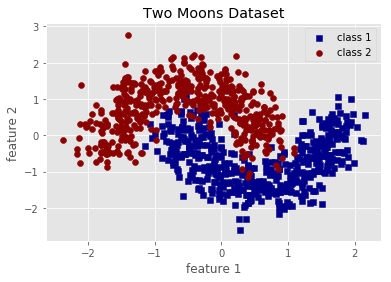

In [2]:
# X contains two features
# y contains labels
X,y = make_moons(n_samples=1000,random_state=1,noise=0.2)
X = StandardScaler().fit_transform(X)

# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="DarkBlue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="DarkRed", marker="o",label="class 2")
plt.legend(scatterpoints=1)
plt.title('Two Moons Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [3]:
model = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, random_state=1, 
                    learning_rate_init=.1)
model.fit(X, y)

Iteration 1, loss = 0.51045812
Iteration 2, loss = 0.35845496
Iteration 3, loss = 0.31749613
Iteration 4, loss = 0.30982111
Iteration 5, loss = 0.28532051
Iteration 6, loss = 0.25549117
Iteration 7, loss = 0.22452739
Iteration 8, loss = 0.17800612
Iteration 9, loss = 0.16316997
Iteration 10, loss = 0.13639758
Iteration 11, loss = 0.16063966
Iteration 12, loss = 0.13070544
Iteration 13, loss = 0.11477573
Iteration 14, loss = 0.11346028
Iteration 15, loss = 0.10806099
Iteration 16, loss = 0.10551342
Iteration 17, loss = 0.10597476
Iteration 18, loss = 0.10940523
Iteration 19, loss = 0.09356930
Iteration 20, loss = 0.10178091
Iteration 21, loss = 0.10235648
Iteration 22, loss = 0.09331141
Iteration 23, loss = 0.09291382
Iteration 24, loss = 0.10389002
Iteration 25, loss = 0.10466577
Iteration 26, loss = 0.10547184
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

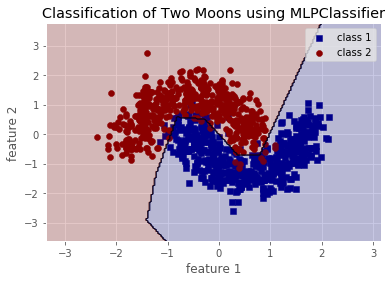

In [4]:
# Plot the data, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="DarkBlue", marker="s",label="class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="DarkRed", marker="o",label="class 2")
plt.legend(scatterpoints=1)

# Plot the predictions made by NN
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=ListedColormap(['DarkRed', 'DarkBlue']), alpha=.2)
plt.contour(xx, yy, zz, colors="black", alpha=1, linewidths=0.2) 

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Classification of Two Moons using MLPClassifier')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [5]:
print('After ', model.n_iter_, ' iterations, the loss is ', model.loss_)
print('model coef shapes')
[print(coef.shape) for coef in model.coefs_]
print('model coefs')
[print(coef) for coef in model.coefs_]
print('model intercepts')
[print(coef) for coef in model.intercepts_]

print(model.get_params())


After  26  iterations, the loss is  0.105471836236
model coef shapes
(2, 3)
(3, 3)
(3, 3)
(3, 1)
model coefs
[[-1.45538319  1.95266486 -2.19153839]
 [ 0.48119992 -0.52172742 -1.14917163]]
[[ 0.84881629 -1.21287704  1.98892248]
 [-0.31298184  1.607918   -0.55635986]
 [ 1.04945602  1.3496739  -0.47041188]]
[[-0.80397104 -1.7798498   2.82996346]
 [ 0.28897265  1.58600398 -0.9980886 ]
 [-2.12063679  0.16940877  1.1990305 ]]
[[ 0.29733504]
 [ 1.20505347]
 [-1.5105632 ]]
model intercepts
[-0.64310462 -1.12094634  0.94005427]
[-2.86559139 -0.17624245  1.47203736]
[-1.33906156  0.06421013  1.42286222]
[-0.06217724]
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation

There are a lot more function parameters for [`MLPClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) than for other scikit-learn classification methods. You'll find that tweaking them also makes a very big difference in the output. Here are some of the important parameters:

#### Network architecture parameters

+ **hidden_layer_sizes**: tuple, length = n_layers - 2, default (100,). 
The i-th element represents the number of neurons in the i-th hidden layer.

+ **activation**: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’. 
Activation function for the hidden layer.
 - ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
 - ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
 - ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
 - ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
 
+ **alpha**: float, optional, default 0.0001. L2 penalty (regularization term) parameter.

#### Optimization related parameters
+ **solver**: {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’. 
The solver for weight optimization.
 - ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
 - ‘sgd’ refers to stochastic gradient descent.
 - ‘adam’ refers to another stochastic gradient-based optimizer

+ **max_iter**: int, optional, default 200. 
Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

+ **random_state**: int, RandomState instance or None, optional, default None. 
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

+ **tol**: float, optional, default 1e-4. 
Tolerance for the optimization. When the loss or score is not improving by at least tol for two consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

+ **verbose**: bool, optional, default False. Whether to print progress messages to stdout.



## Activation function 

There are several choices of **activation function**: hyperbolic tangent, logistic, and rectified linear unit (ReLU). In the previous example, we used the default activation function, ReLU. 

 Many more activations functions are listed on [this wikipedia page](https://en.wikipedia.org/wiki/Activation_function).



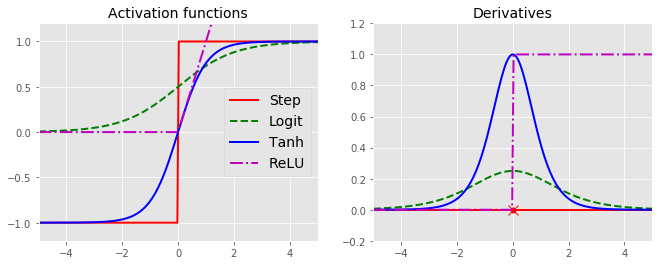

In [6]:
# see Géron, Ch. 10

def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

**Exercise**: By changing the hidden_layer_sizes and activation function, can you find a better classifier for the two moons dataset above?

You might want to remove the preselected random_state. 


## Training a neural network
We'll follow the scikit-learn  [user guide](http://scikit-learn.org/stable/modules/neural_networks_supervised.html) 
to see how the multi-layer perceptron (MLP) neural network is trained. 

The MLP uses a loss function of the form 
$$
Loss(\hat{y},y,W) =  \frac{1}{2} \sum_{i=1}^n f(\hat{y}_i(W),y_i) + \frac{\alpha}{2} \|W\|_2^2
$$
Here, 
+ $y_i$ are the labels for the $i$-th example, 
+ $\hat{y}_i(W)$ are the predicted label for the $i$-th example, 
+ W is a list of all the parameters in the model
+ $f$ is a function that measures the error, typically $L^2$ difference for regression or cross-entropy for classification, and 
+ $\alpha$ is a regularization parameter. 

Starting from initial random weights, the loss function is minimized by repeatedly updating these weights. The details of this depend on the chosen method, either a quasi-Newton method `lbfgs`, stochastic gradient descent `sgd`, or `adam`. 

In the **gradient descent method**, the gradient $\nabla_{W} Loss$ of the loss with respect to the weights is computed. The weights are then changed in the negative gradient direction using a step-length or learning-rate $\varepsilon>0$: 
$$
W \leftarrow W - \varepsilon \nabla_W {Loss}.
$$
The algorithm stops when it reaches a preset maximum number of iterations, `max_iter`, 
or when the improvement in loss is below a preset small number, `tol`.

The gradient of $W$ is simply computed using the chain rule from calculus. In principle the idea is simple, but in practice it is a complicated job. Data analysts have figured out a clever way how to organize this calculation. This is sometimes called *back propagation*. 

A complete description of `lbfgs`, `sgd`, and `adam` is beyond the scope of the course. I'll just say that they are clever modifications to the gradient descent method. 

Let's see a comparison of optimization methods, taken from [this page](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html). 


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096922
training: constant with momentum


/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 0.980000
Training set loss: 0.050260
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.050277
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.979983
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504017
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504760
training: adam
Training set score: 0.980000
Training set loss: 0.046248

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling learning-rate
Training set score: 0.638843
Training set loss: 1.855465
training: inv-scaling with momentum
Training set score: 0.912632
Training set 

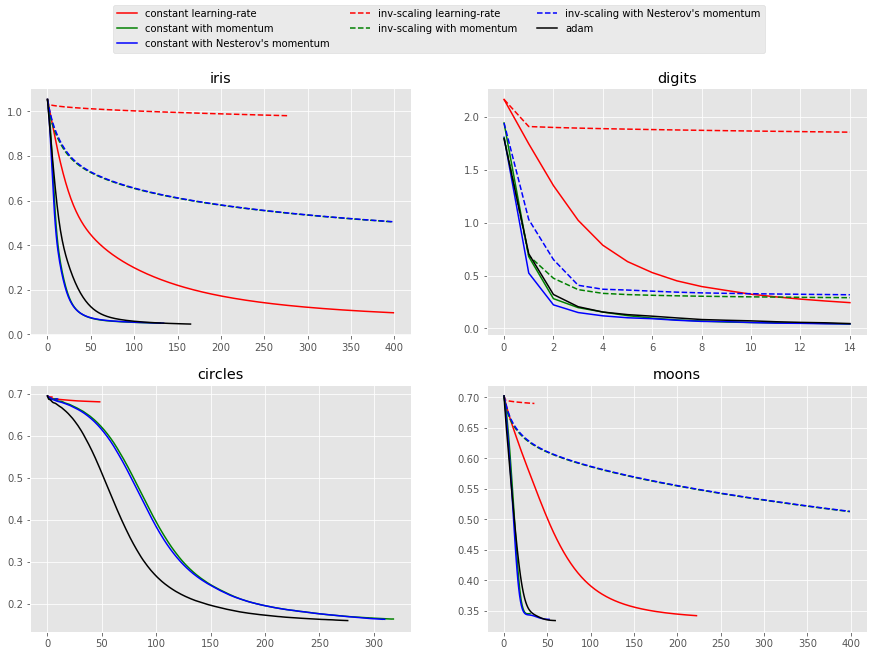

In [7]:
# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(iris.data, iris.target),
             (digits.data, digits.target),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

Some advise on optimization methods according to [this page](http://scikit-learn.org/stable/modules/neural_networks_supervised.html): 
* Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. SGD with momentum or Nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.

## Example: breast cancer data

In [8]:
cancer = load_breast_cancer()
print(cancer.keys())

# 569 data points with 30 features
cancer['data'].shape

# full description:
print(cancer['DESCR'])

X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

scaler = StandardScaler()
scaler.fit(X_train) # Fit only to the training data

# Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Ra

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),random_state=1)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[51  0]
 [ 0 63]]


## Example: MNIST dataset

Let's train a multi layer perceptron on the MNIST dataset. 

This MNIST database contains a total of 70,000 examples of handwritten digits of size 28x28 pixels, labeled from 0 to 9.

To download this MNIST dataset, you can no longer simply use 
```
mnist = fetch_mldata("MNIST original")
```

Following the hints on [this website](https://stackoverflow.com/questions/51301570/fetch-mldata-how-to-manually-set-up-mnist-dataset-when-source-server-is-down/51301798#51301798), 
you should download the dataset directly from [this website](https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat) and save it to the folder  `mldata` in the directory you get if you run the command 
```
get_data_home()
```


In [10]:
mnist = fetch_mldata('MNIST original',transpose_data=True, data_home=get_data_home())

# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                     solver='adam', verbose=10, tol=1e-4, random_state=1)
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))

Iteration 1, loss = 0.40451061
Iteration 2, loss = 0.15583057
Iteration 3, loss = 0.11098385
Iteration 4, loss = 0.08411502
Iteration 5, loss = 0.06846576
Iteration 6, loss = 0.05652346
Iteration 7, loss = 0.04633846
Iteration 8, loss = 0.03762209
Iteration 9, loss = 0.03365538
Iteration 10, loss = 0.02884553
Iteration 11, loss = 0.02224694
Iteration 12, loss = 0.01873422
Iteration 13, loss = 0.01647119
Iteration 14, loss = 0.01460615
Iteration 15, loss = 0.01141324
Iteration 16, loss = 0.01314417
Iteration 17, loss = 0.01043379
Iteration 18, loss = 0.00753701
Iteration 19, loss = 0.00898900
Iteration 20, loss = 0.00699743
Iteration 21, loss = 0.00740891
Iteration 22, loss = 0.00942422
Iteration 23, loss = 0.00850921
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.997483
Test set score: 0.976600
[[ 971    0    0    1    1    2    2    1    2    0]
 [   0 1124    1    4    0    1    2    1    2    0]
 [   3    1 1004   11 

**Exercise**: By adjusting the parameters in the MLPClassifier, improve the test set score. 
    

**Note**: [This webpage](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)
tries to interpret the MLP classification weights learned for the MNIST dataset. 



## Example: Regression with Neural Networks in scikit-learn

Let's use a multi-layer perceptron for regression. This can be done with the scikit-learn [`MLPRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) function. 


In [12]:
housing = fetch_california_housing()

print(housing.keys())

# 20640 data points with 8 features
housing['data'].shape

# full description:
print(housing['DESCR'])

X = housing['data']
y = housing['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# scale data
scaler = StandardScaler()
scaler.fit(X_train) # Fit only to the training data

# Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [13]:
# Linear Regression with Scikit-Learn
lin_reg = LinearRegression()
print(lin_reg.get_params())

lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_)
print(lin_reg.coef_)

print(lin_reg.score(X_test,y_test)) # score = 1 is good

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
2.07263225048
[ 0.84369035  0.11955028 -0.27951866  0.30152588 -0.00849406 -0.04319353
 -0.86899758 -0.83804304]
0.592689328845


In [14]:
# MLP regression with Scikit-Learn
mlp_reg = MLPRegressor(hidden_layer_sizes=(8,8),verbose=0,random_state=2,solver='adam')
print(mlp_reg.get_params())

mlp_reg.fit(X_train, y_train)

print(mlp_reg.score(X_test,y_test)) # score = 1 is good

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (8, 8), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 2, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
0.768766299198




## Another resource: Neural Networks demystified

There is a good sequence of 7 videos called **Neural Networks demystified** from Welch Labs that builds and trains a neural network from scratch in python. 
* Part 1: [Data + Architecture](https://www.youtube.com/watch?v=bxe2T-V8XRs)
+ Part 2: [Forward Propagation](https://www.youtube.com/watch?v=UJwK6jAStmg)
+ Part 3: [Gradient Descent](https://www.youtube.com/watch?v=5u0jaA3qAGk)
+ Part 4: [Backpropagation](https://www.youtube.com/watch?v=GlcnxUlrtek)
+ Part 5: [Numerical Gradient Checking](https://www.youtube.com/watch?v=pHMzNW8Agq4&t=22s)
+ Part 6: [Training](https://www.youtube.com/watch?v=9KM9Td6RVgQ)
+ Part 7: [Overfitting, Testing, and Regularization](https://www.youtube.com/watch?v=S4ZUwgesjS8)

If you're interested in learning more about how Neural Networks are trained, I would recommend watching these videos. 

The accompanying code is [on github](https://github.com/stephencwelch/Neural-Networks-Demystified) and can be obtained via 
```
git clone https://github.com/stephencwelch/Neural-Networks-Demystified.git
```

## Neural Networks for large scale applications.

We have now seen how to use neural networks in scikit-learn. However, this implementation does not scale to large-scale applications. (There is no GPU support and limited architectures.) 

There are many other packages that have more advanced implementations of neural networks. Here is a partial list with short descriptions taken from the packages.
* [TensorFlow](https://github.com/tensorflow/tensorflow): TensorFlow™ is an open source C++ software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API. 
+ [Torch](http://torch.ch/): Torch is a scientific computing framework with wide support for machine learning algorithms that puts GPUs first.
+ [PyTorch](http://pytorch.org/): PyTorch is a deep learning framework that puts Python first. 
+ [CNTK](https://github.com/Microsoft/cntk)  Cognitive Toolkit (CNTK) is an open source deep-learning toolkit developed by Microsoft. 
+ [Theano](https://github.com/Theano/Theano): Theano is a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently. It can use GPUs and perform efficient symbolic differentiation.

+ [keras](https://github.com/keras-team/keras): Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
+ [MXNet](https://github.com/dmlc/mxnet): Lightweight, Portable, Flexible Distributed/Mobile Deep Learning with Dynamic, Mutation-aware Dataflow Dep Scheduler; for Python, R, Julia, Scala, Go, Javascript and more
+ [Caffe](http://caffe.berkeleyvision.org/): Caffe is a deep learning framework made with expression, speed, and modularity in mind. It is developed by Berkeley AI Research (BAIR) and by community contributors.
+ [Lasagne](https://github.com/Lasagne/Lasagne): Lightweight library to build and train neural networks in Theano. 
+ [prettytensor](https://github.com/google/prettytensor/): 
Pretty Tensor provides a high level builder API for TensorFlow. It provides thin wrappers on Tensors so that you can easily build multi-layer neural networks.

+ [Deeplearning4j](https://deeplearning4j.org/): Open-Source, Distributed, Deep Learning Library for the JVM
+ [H2O](https://github.com/h2oai): Fast Scalable Machine Learning For Smarter Applications
+ ... 

**Next time**: Neural Networks with TensorFlow